In [1]:
import os

import elettra_toolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from cpymad.madx import Madx
from matplotlib import cm, gridspec, patches
from pyhdtoolkit import cpymadtools

plt.rcParams.update({"text.usetex": False})

In [2]:
if os.path.exists("stdout.out"):
    os.remove("stdout.out")

# Launch MAD-X Session
with open("stdout.out", "w") as f:
    madx = Madx(stdout=f)


# Read parameters

from config import parameters, settings

for i in parameters.keys():
    madx.globals[i] = parameters[i]


# Call sequence and optics

madx.call("elettra2_v15_VADER_2.3T.madx")
madx.call("optics_elettra2_v15_VADER_2.3T.madx")

# Set opt AB

k_ab_opt = 5.191616161616161
# Optimal value for the antibeands
madx.globals.k1_bqf1 = k_ab_opt
madx.globals.k1_bqf2 = k_ab_opt
madx.globals.k1_bqf3 = k_ab_opt
madx.globals.k1_bqf4 = k_ab_opt

# Initial twiss

madx.use(sequence="ring")
madx.twiss(sequence="ring", table="init_twiss")

# Compute Emittance

madx.input(
    f"""
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
"""
)

# Stop MAD-X instance

# madx.quit()

# Get the emittance from the standard output

ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)


print(f"Emittance x : {ex*1e12} pm")

Emittance x : 164.33805 pm


In [3]:
twiss = madx.table.init_twiss.dframe()

2021-10-05 15:49:10.516 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-05 15:49:10.517 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-05 15:49:10.991 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-05 15:49:11.055 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-05 15:49:12.295 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-05 15:49:12.312 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-05 15:49:12.337 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim for longitudinal coordinate


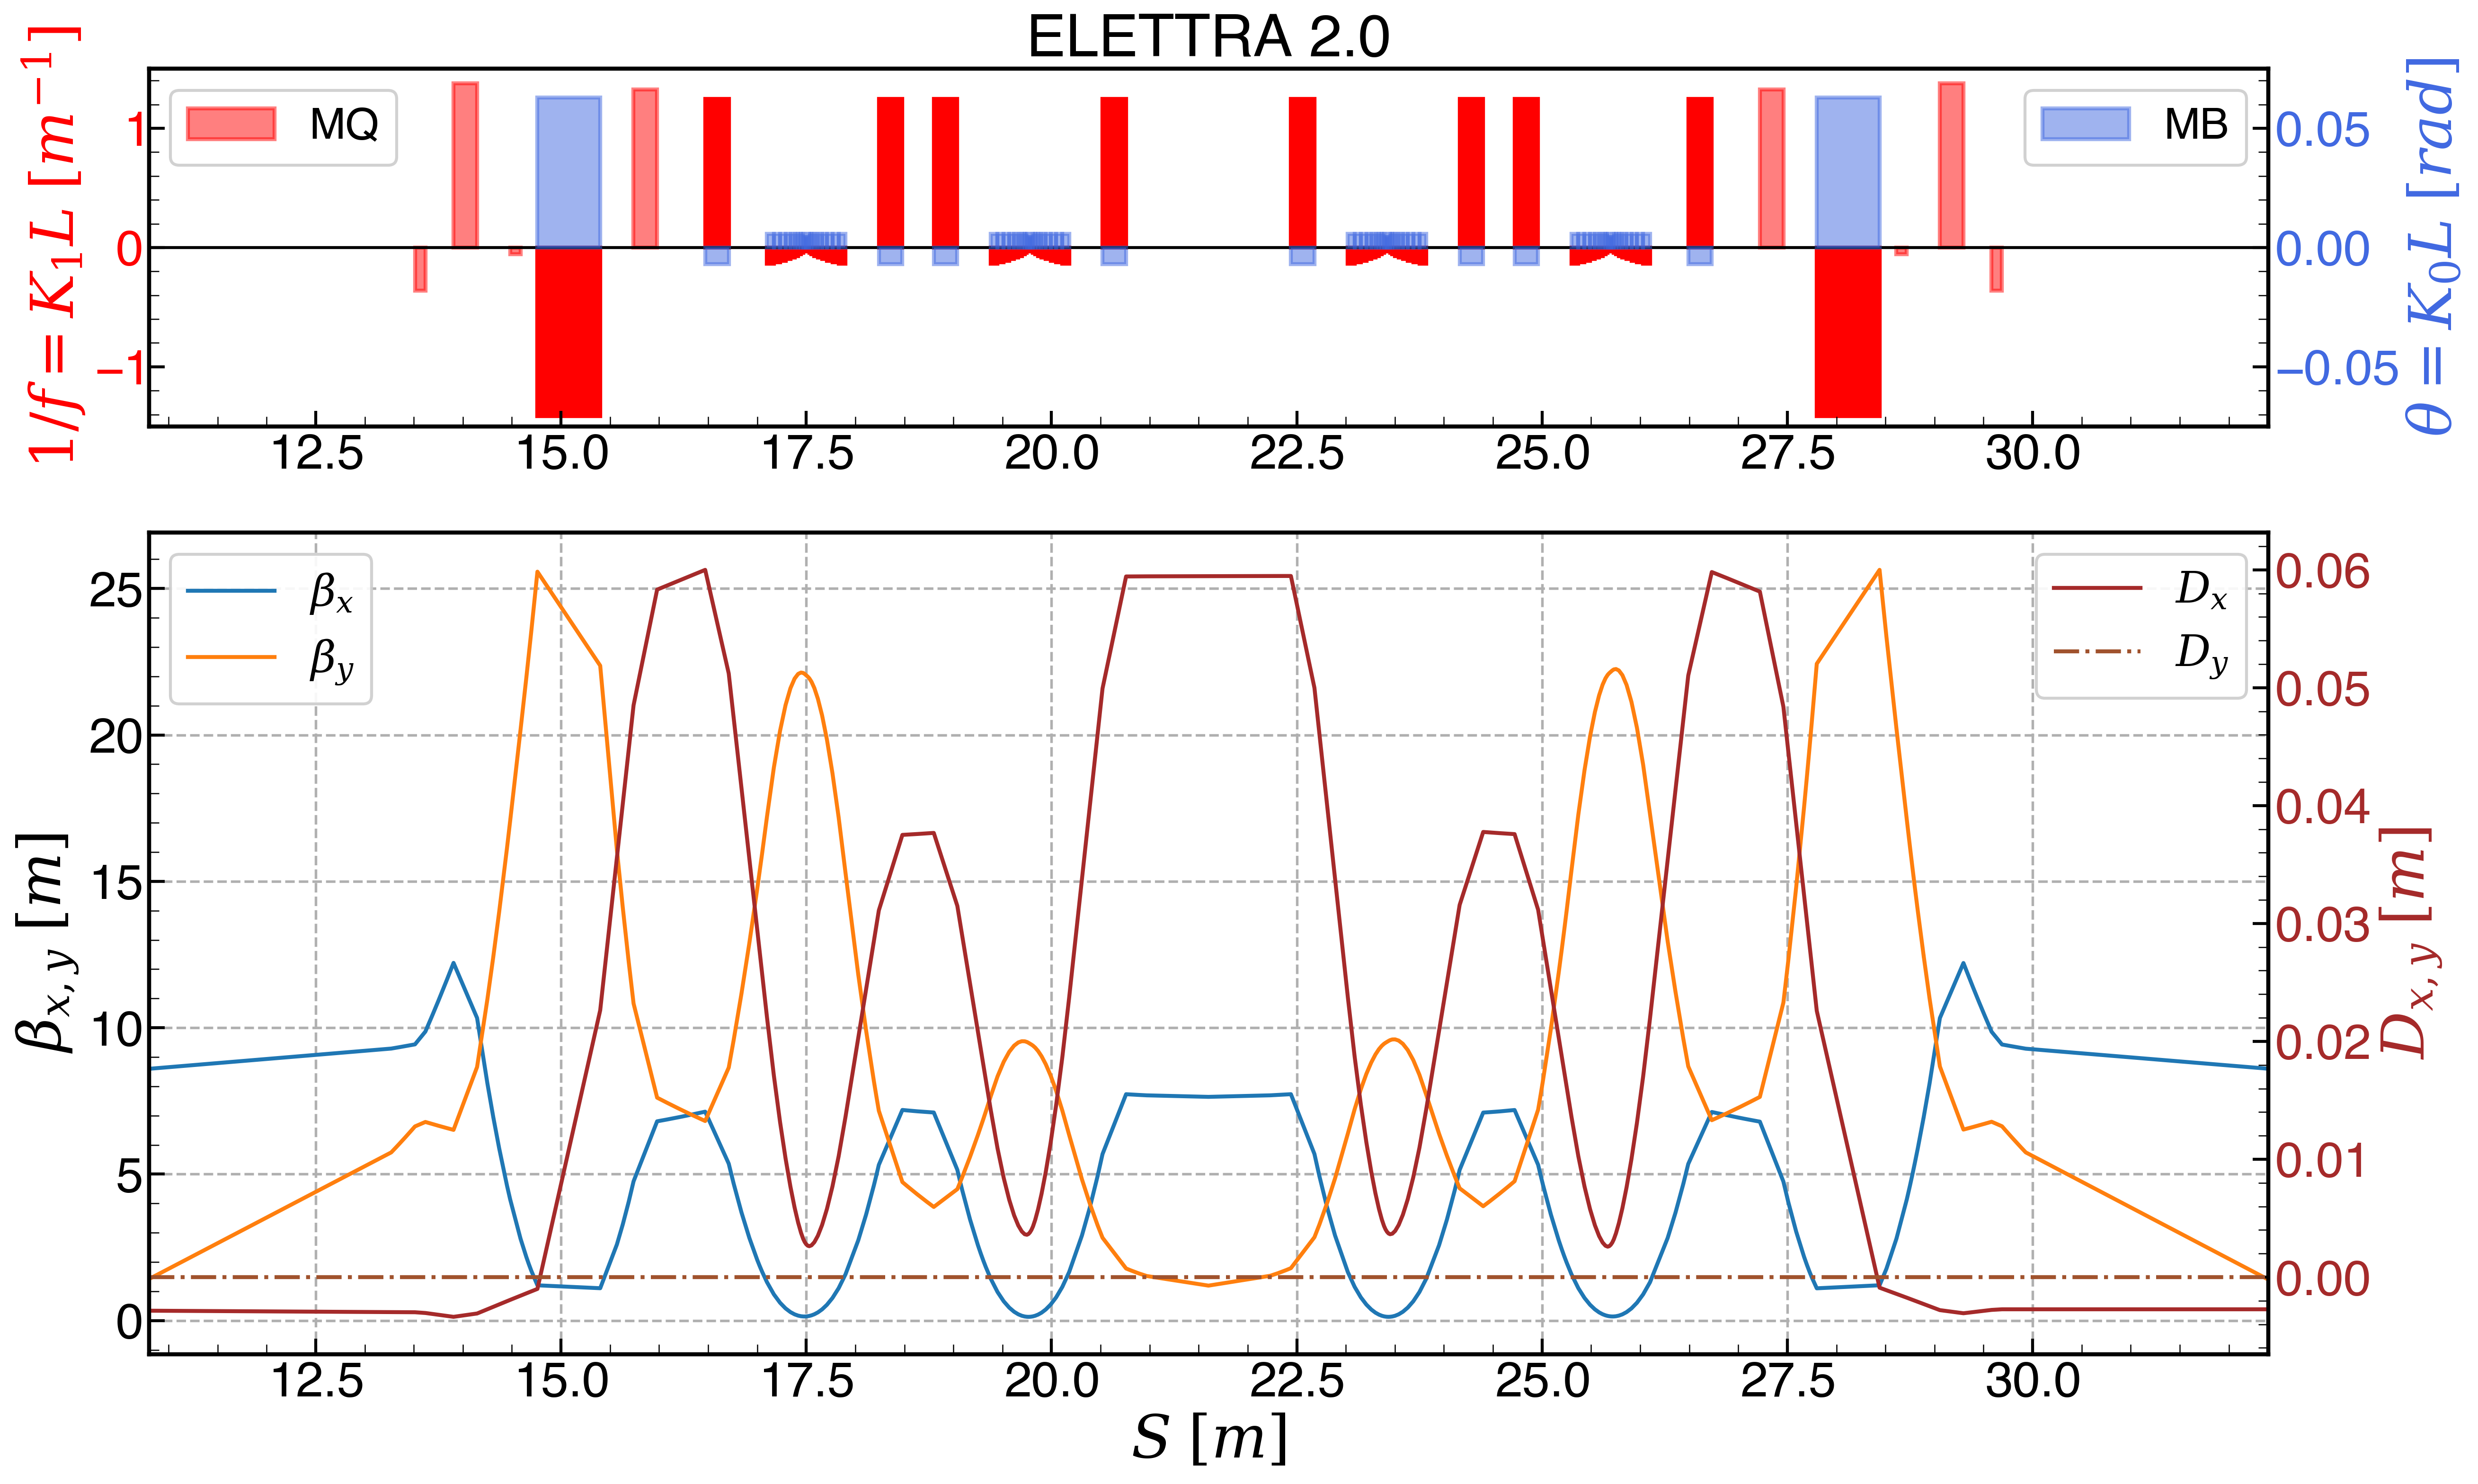

In [4]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:3"]["s"][0]

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=None,
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

2021-10-05 15:49:19.623 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-05 15:49:19.623 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-05 15:49:20.094 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-05 15:49:20.158 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-05 15:49:21.517 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-05 15:49:21.534 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-05 15:49:21.552 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:687 - Setting ylim for dispersion plot
2021-10-05 15:49:21.553 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim 

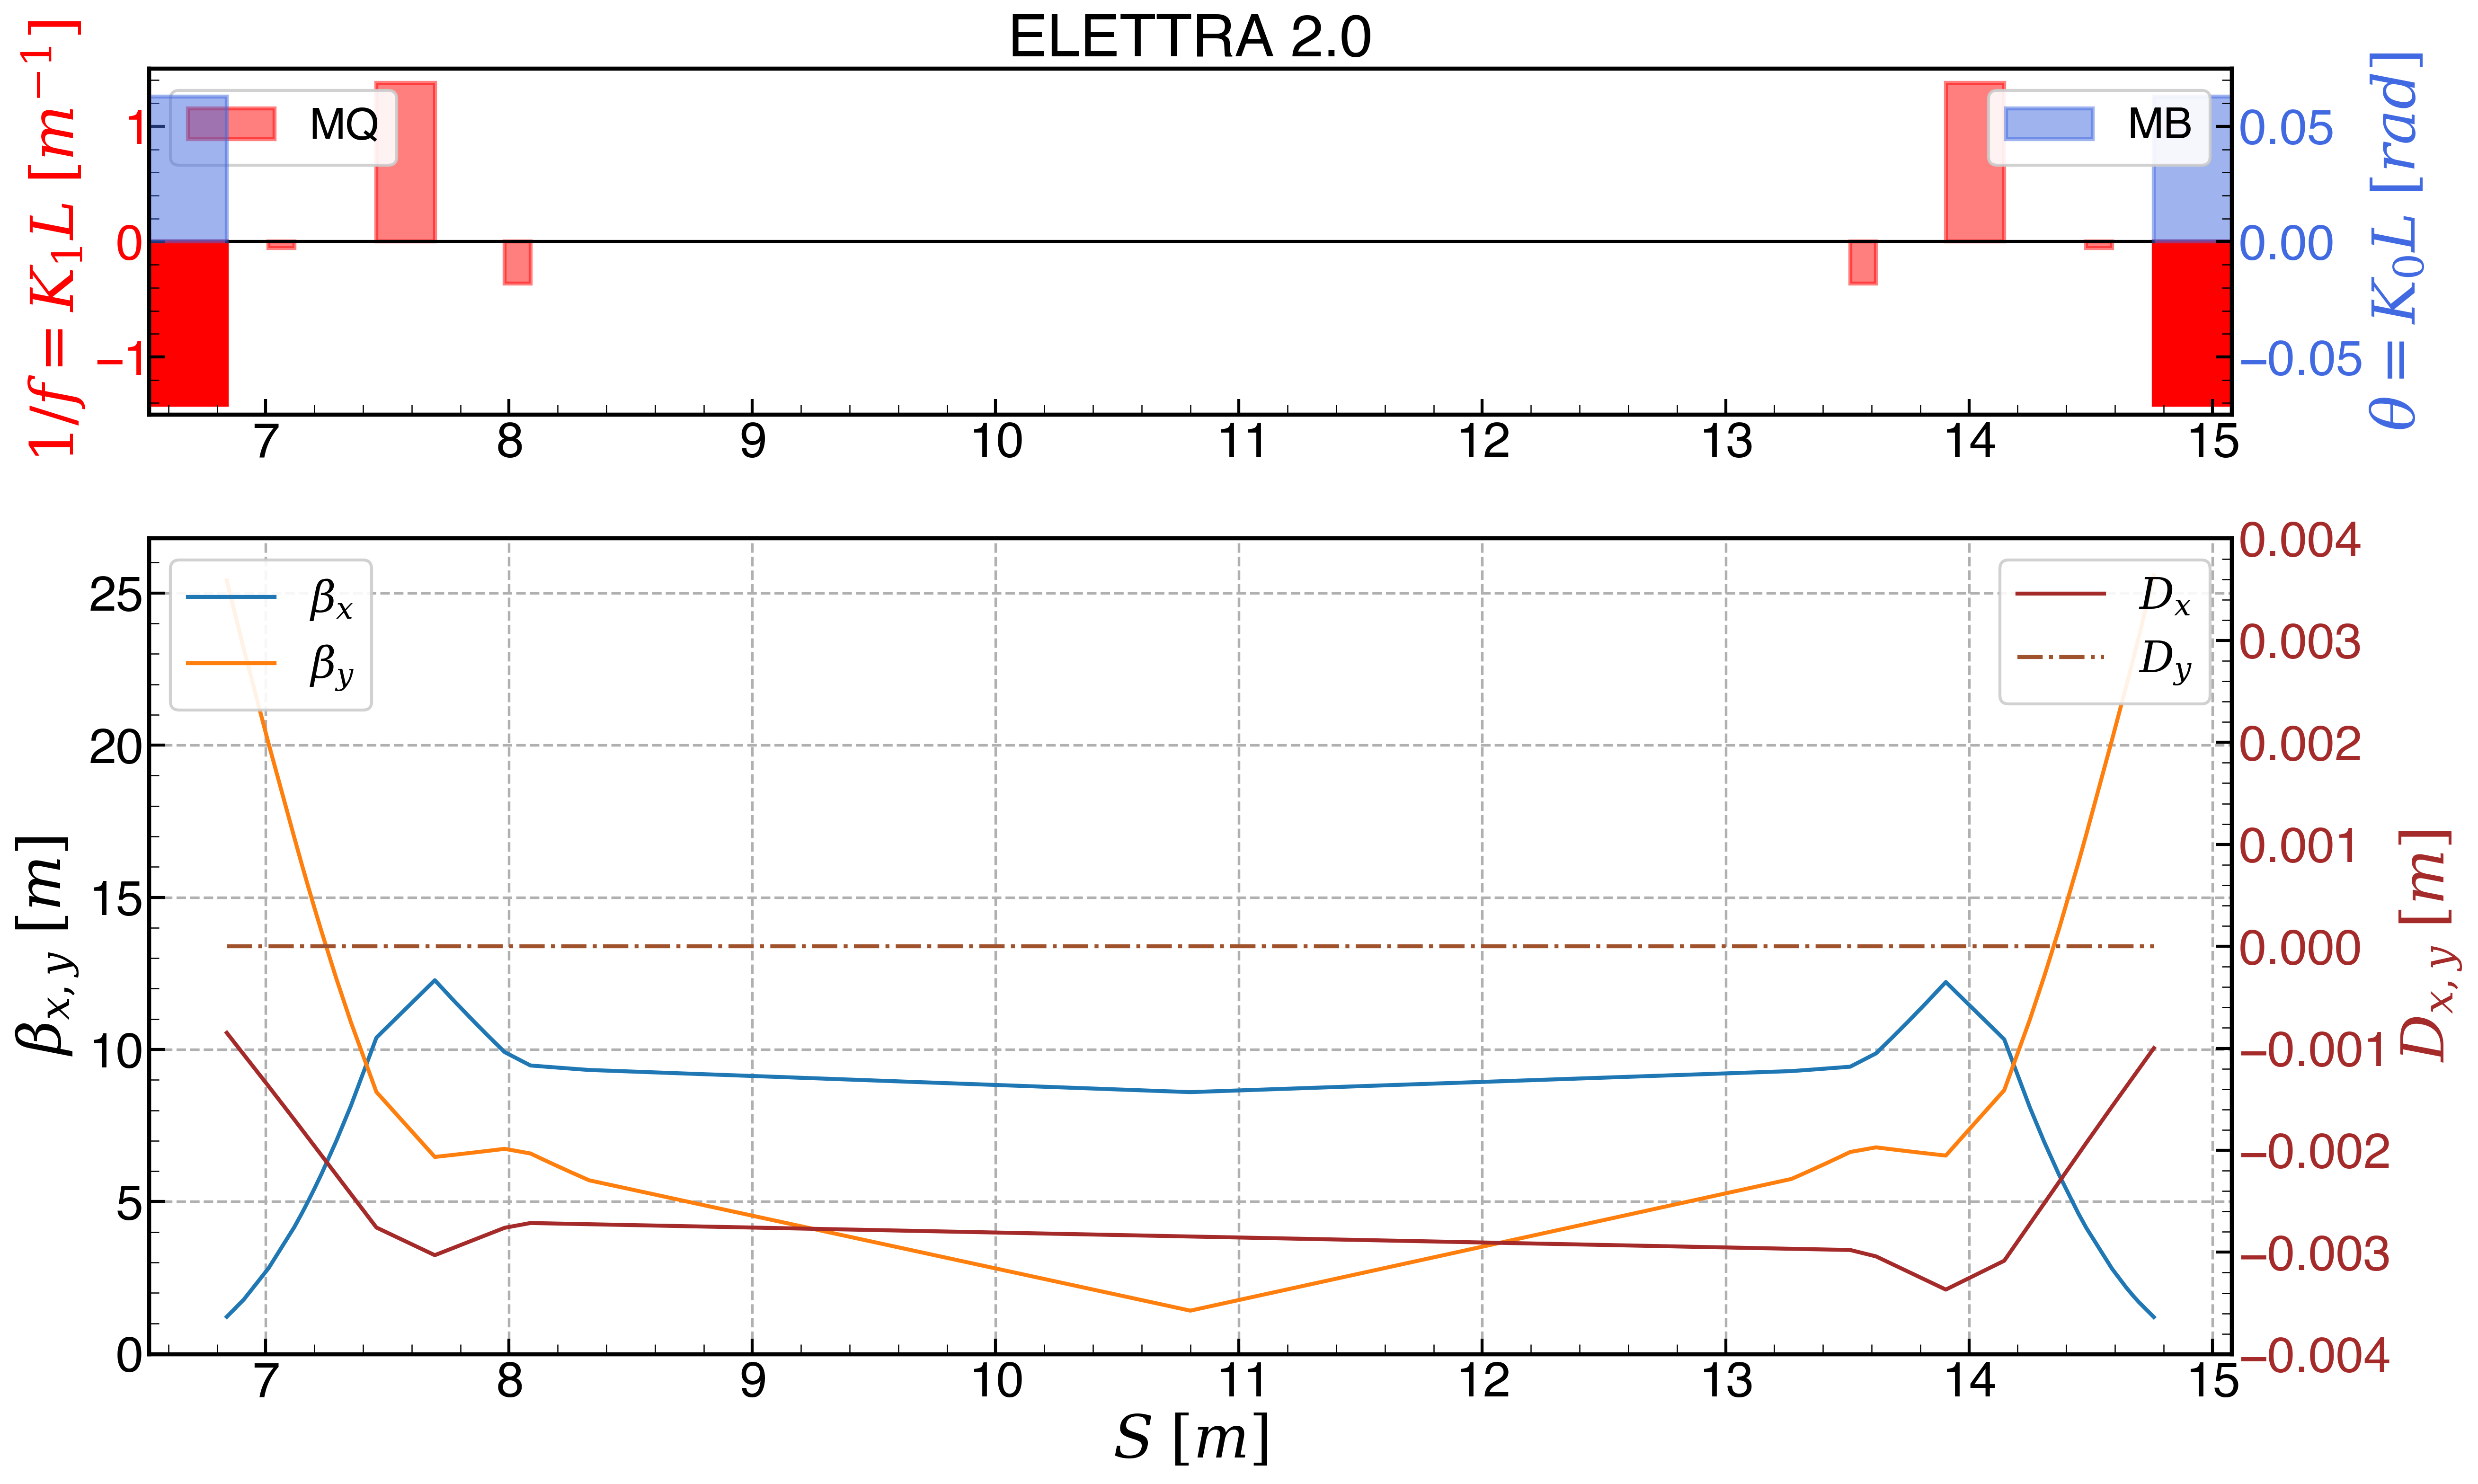

In [5]:
s_start = twiss[twiss.name == "bf1:1"]["s"][0] - twiss[twiss.name == "bf1:1"]["l"][0] / 2
s_end = twiss[twiss.name == "bf1:2"]["s"][0] - twiss[twiss.name == "bf1:2"]["l"][0] / 2

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=(-0.004, 0.004),
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

In [6]:
madx.input(
    """

!match, range=ll[1]/ll[3], dx=0, dy=0;
match, sequence=ring;
vary, name=k1_qd1, step=1e-6;
vary, name=k1_qf1, step=1e-6;
vary, name=k1_qd2, step=1e-6;
vary, name=k1_qf2, step=1e-6;
constraint, range=ll[1], dx=0, dy=0;
constraint, range=ll[3], dx=0, dy=0;
lmdif, calls=1000, tolerance=1e-21;
endmatch;


"""
)

True

2021-10-05 15:49:38.956 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-05 15:49:38.957 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-05 15:49:39.425 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-05 15:49:39.484 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-05 15:49:40.849 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-05 15:49:40.865 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-05 15:49:40.887 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim for longitudinal coordinate


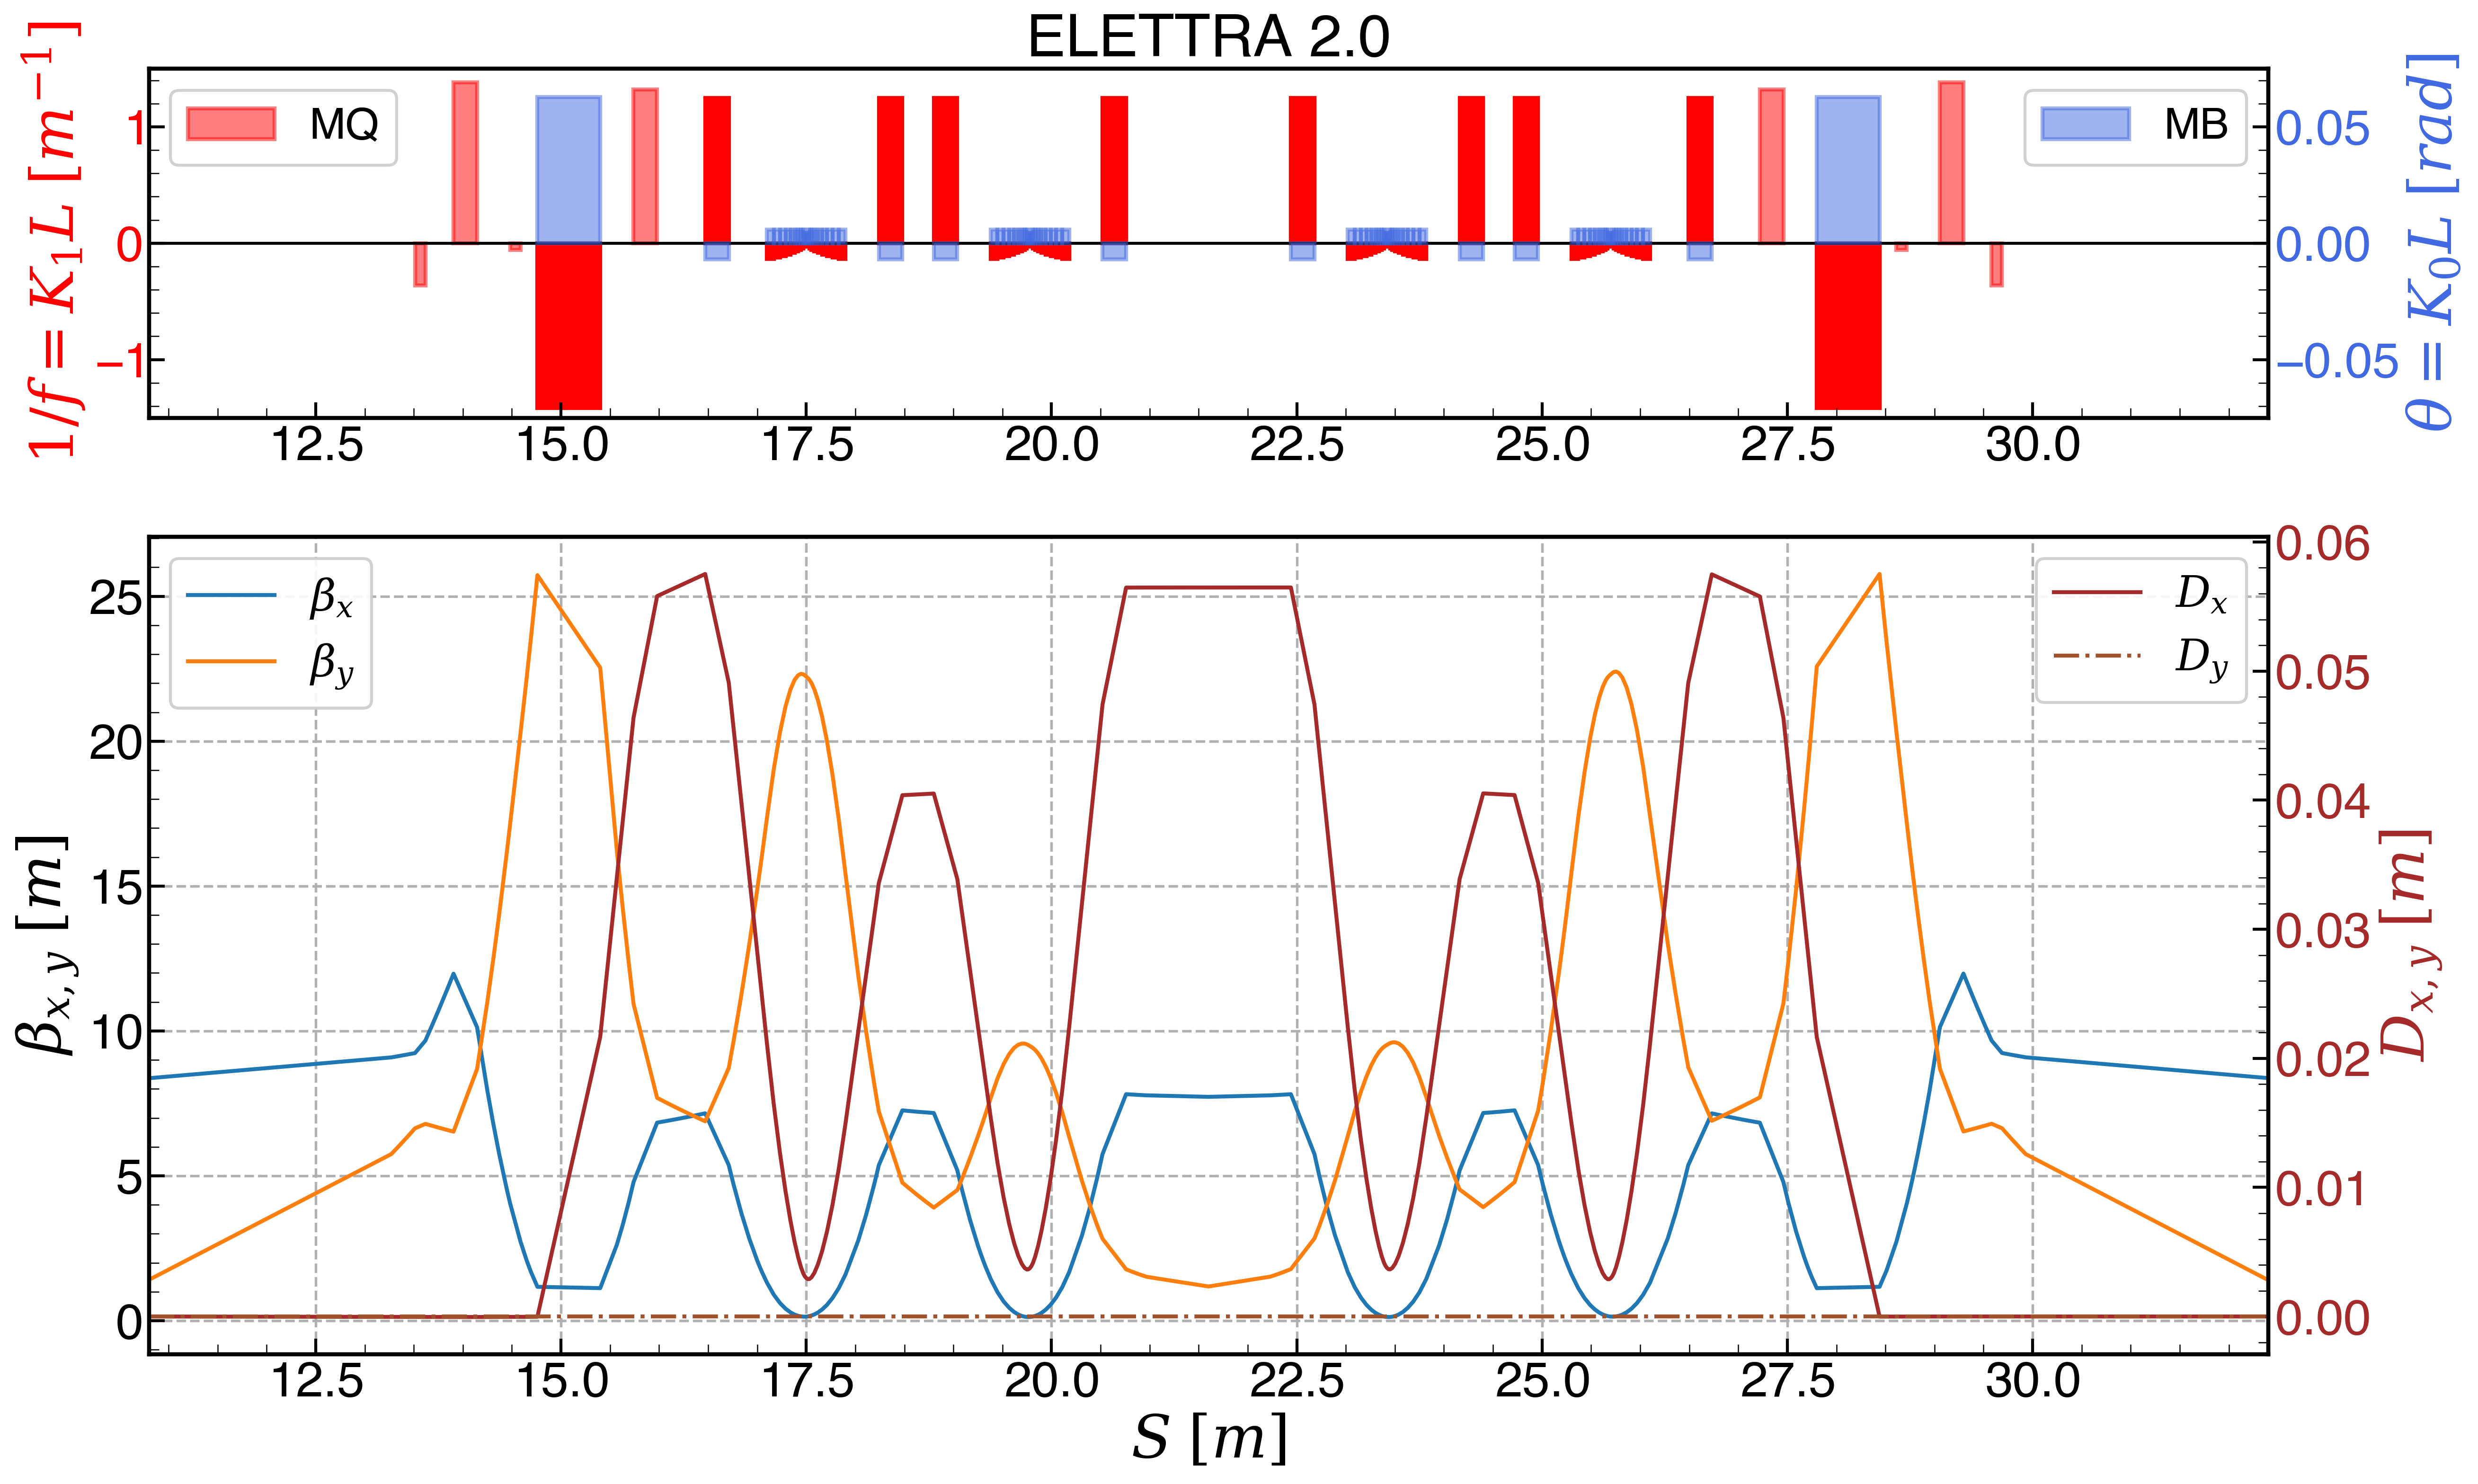

In [7]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:3"]["s"][0]

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=None,
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

In [8]:
# Compute Emittance

madx.input(
    f"""
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
"""
)

# Stop MAD-X instance

# madx.quit()

# Get the emittance from the standard output

ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)


print(f"Emittance x : {ex*1e12} pm")

Emittance x : 155.66564 pm


2021-10-05 15:49:50.939 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-05 15:49:50.940 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-05 15:49:51.418 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-05 15:49:51.480 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-05 15:49:52.733 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-05 15:49:52.750 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-05 15:49:52.776 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:687 - Setting ylim for dispersion plot
2021-10-05 15:49:52.777 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim 

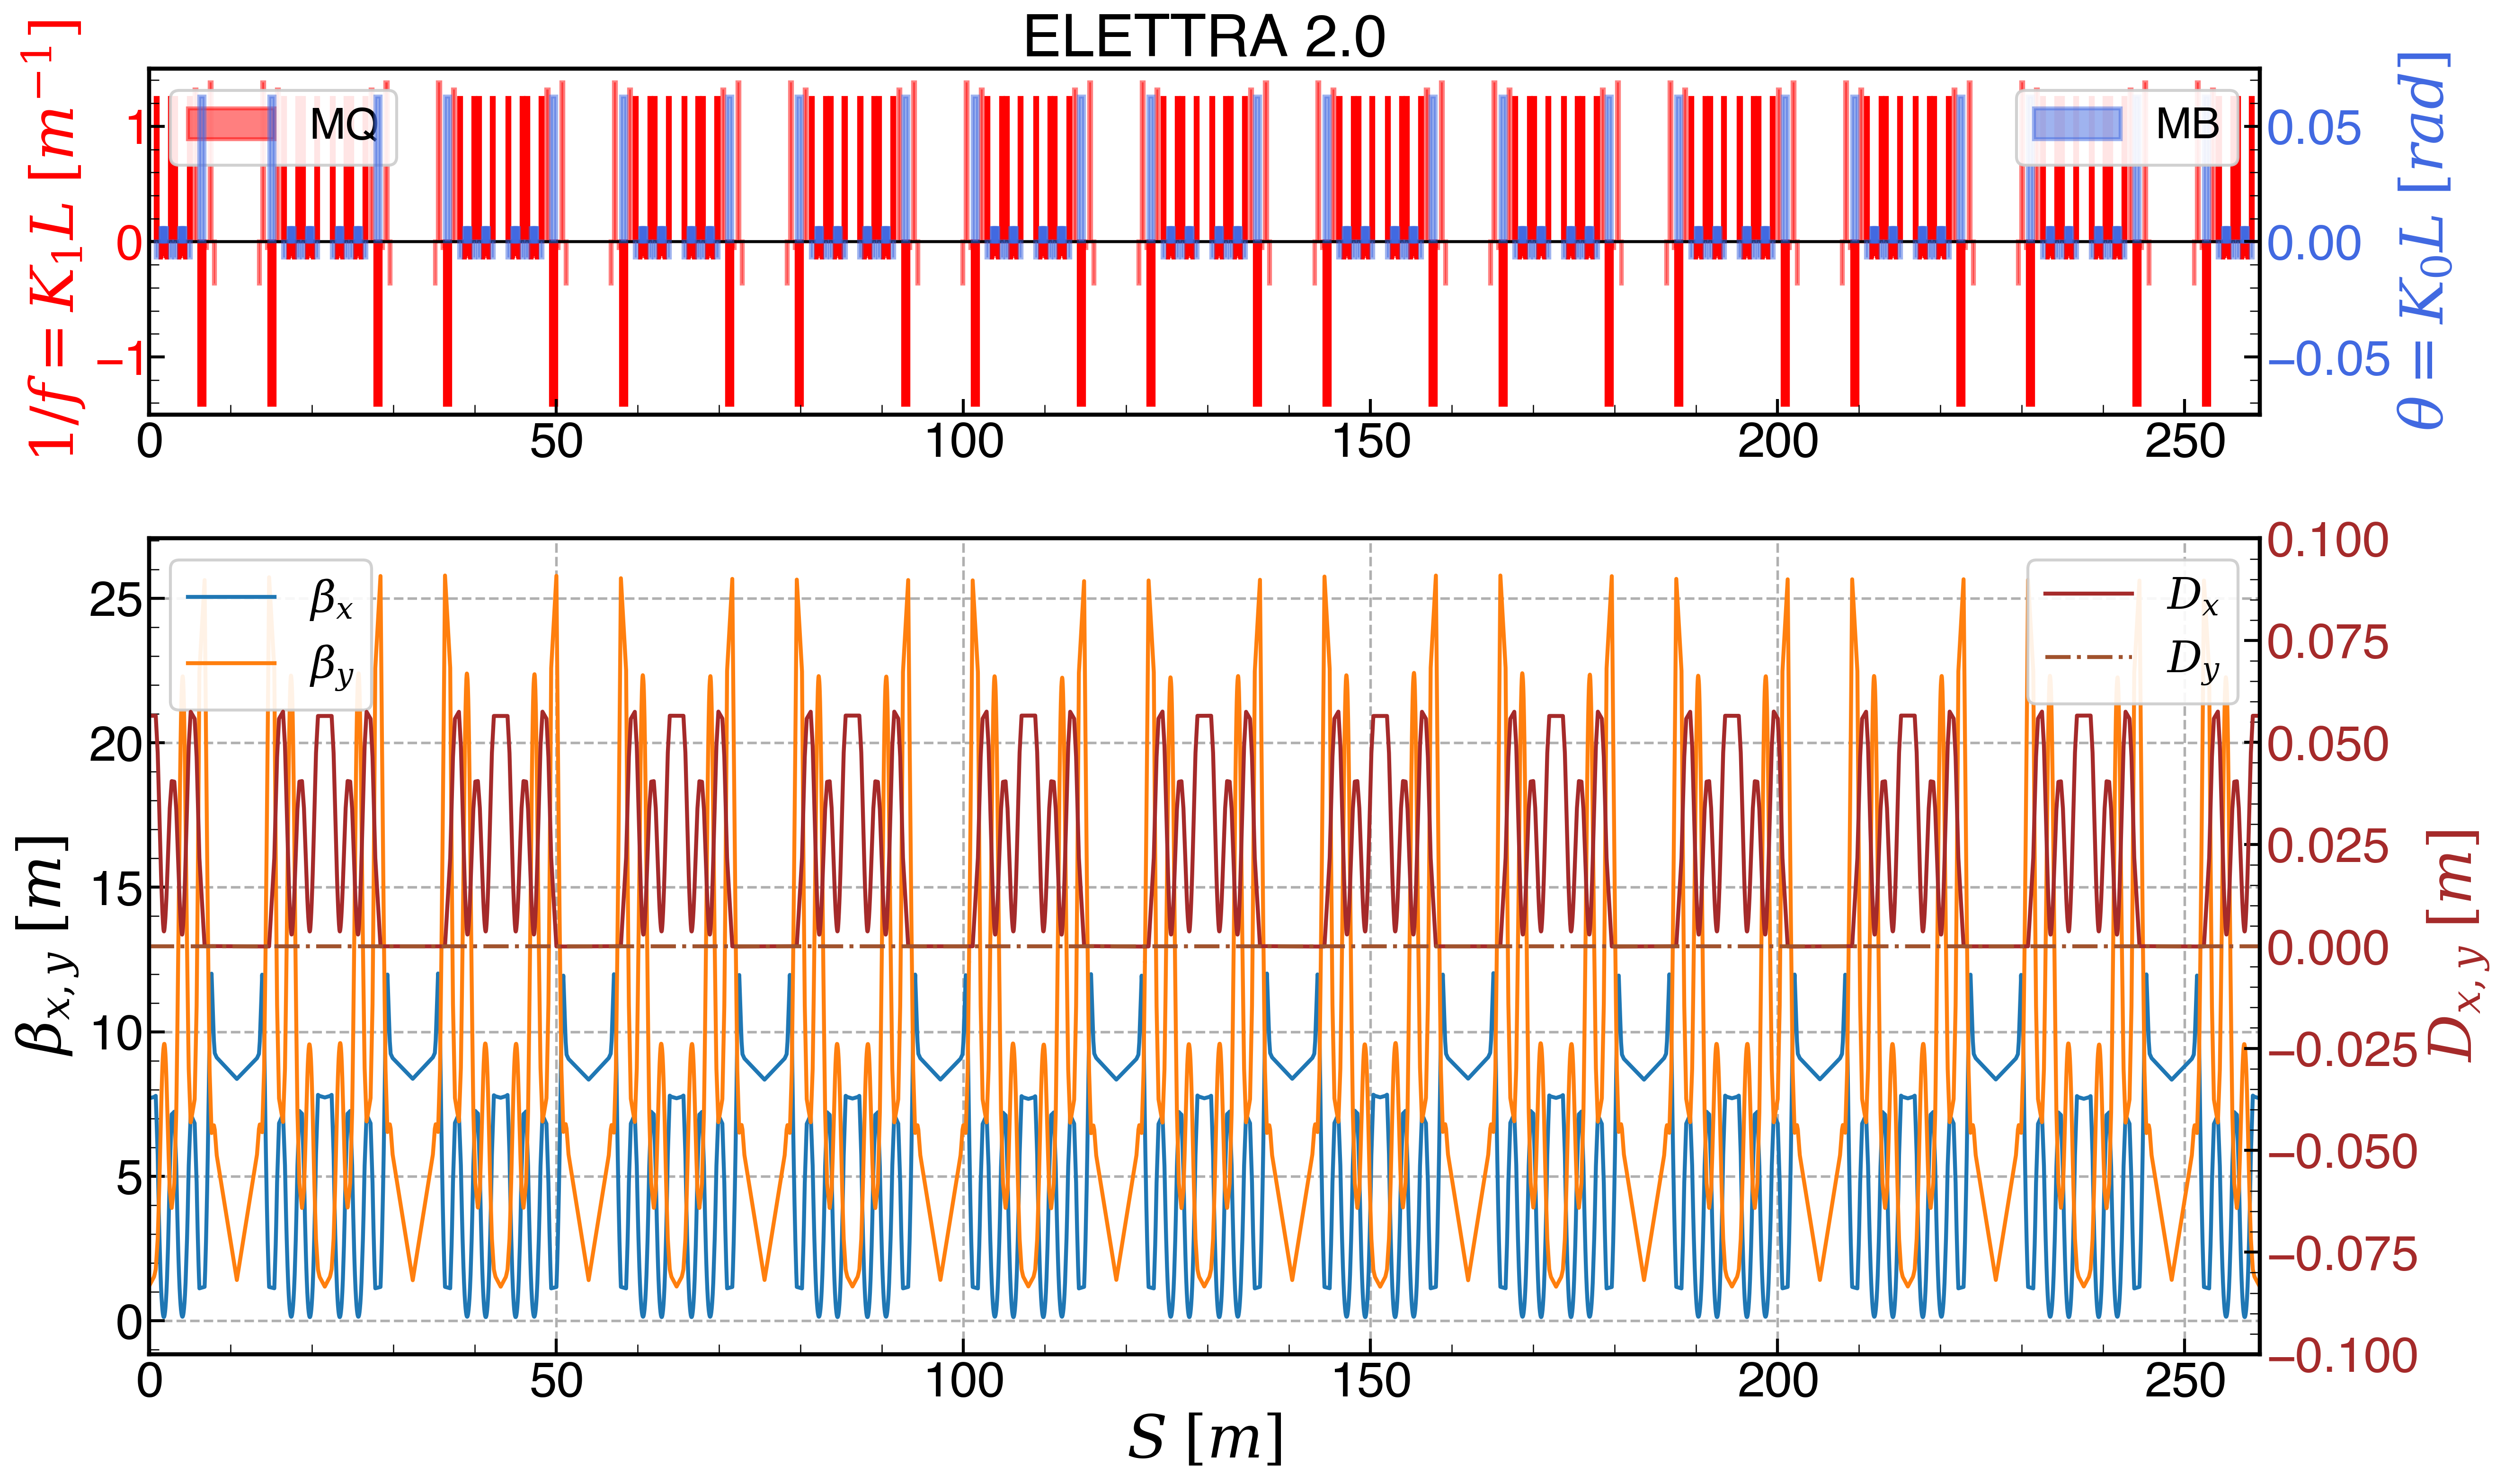

In [9]:
fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=None,
    disp_ylim=(-0.1, 0.1),
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)